In [20]:
%load_ext cudf.pandas
import pandas as pd


The cudf.pandas extension is already loaded. To reload it, use:
  %reload_ext cudf.pandas


In [28]:
%%cudf.pandas.profile
df = pd.DataFrame({'a': [0, 1, 2], 'b': [3, 4, 3]})

df.min(axis=1)
out = df.groupby('a').filter(
    lambda group: len(group) > 1
)

                                                                                                             
                                          Total time elapsed: 0.215 seconds                                  
                                        3 GPU function calls in 0.018 seconds                                
                                        1 CPU function calls in 0.006 seconds                                
                                                                                                             
                                                        Stats                                                
                                                                                                             
┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ DataFrame               │ 1          │ 0.013       │ 0.013       │ 0          │ 0.000       │ 0.000       │
│ DataFrame.min           │ 1          │ 0.006       │ 0.006       │ 0          │ 0.000       │ 0.000       │
│ DataFrame.groupby       │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DataFrameGroupBy.filter │ 0          │ 0.000       │ 0.000       │ 1          │ 0.006       │ 0.006       │
└─────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- DataFrameGroupBy.filter

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=666289;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [24]:
%%cudf.pandas.line_profile
df = pd.DataFrame({'a': [0, 1, 2], 'b': [3, 4, 3]})

df.min(axis=1)
out = df.groupby('a').filter(
    lambda group: len(group) > 1
)



                                                                                                  
                                    Total time elapsed: 0.463 seconds                             
                                                                                                  
                                                  Stats                                           
                                                                                                  
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Line no. ┃ Line                                                    ┃ GPU TIME(s) ┃ CPU TIME(s) ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ 1        │     df = pd.DataFrame({'a': [0, 1, 2], 'b': [3, 4, 3]}) │ 0.001777824 │             │
│          │                                                         │             │             │
│ 3        │     df.min(axis=1)                                      │ 0.003584588 │             │
│          │                                                         │             │             │
│ 4        │     out = df.groupby('a').filter(                       │ 0.000271924 │             │
│          │                                                         │             │             │
│ 5        │         lambda group: len(group) > 1                    │             │ 0.000309368 │
│          │                                                         │             │             │
└──────────┴─────────────────────────────────────────────────────────┴─────────────┴─────────────┘

   A   B   C
0  1  10  11
1  2  20  22
2  3  30  33
3  4  40  44
4  5  50  55


/home/cismine/anaconda3/envs/ML_GPU/lib/python3.11/site-packages/cudf/core/indexed_frame.py:3566: UserWarning: GPU-accelerated mergesort is currently not supported, defaulting to quicksort.
  warnings.warn(


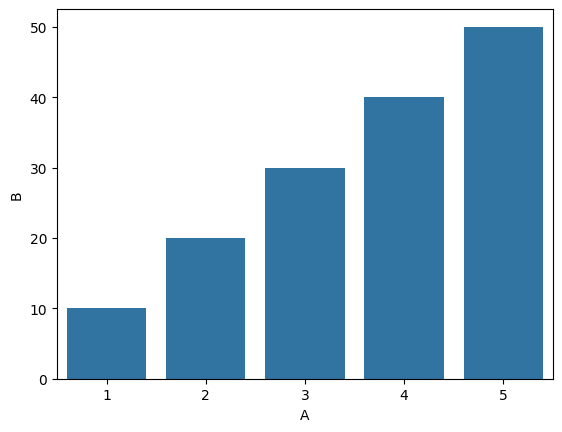

                                                                                                                  
                                            Total time elapsed: 0.575 seconds                                     
                                         142 GPU function calls in 0.167 seconds                                  
                                          40 CPU function calls in 0.066 seconds                                  
                                                                                                                  
                                                          Stats                                                   
                                                                                                                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                     ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ DataFrame                    │ 2          │ 0.012       │ 0.006       │ 0          │ 0.000       │ 0.000       │
│ DataFrame.__getitem__        │ 26         │ 0.018       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ OpsMixin.__add__             │ 2          │ 0.002       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ DataFrame.__setitem__        │ 10         │ 0.009       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ object.__str__               │ 1          │ 0.005       │ 0.005       │ 0          │ 0.000       │ 0.000       │
│ Index.to_frame               │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ DataFrame.to_dict            │ 2          │ 0.005       │ 0.003       │ 0          │ 0.000       │ 0.000       │
│ NDFrame.__contains__         │ 12         │ 0.005       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Series                       │ 19         │ 0.034       │ 0.002       │ 0          │ 0.000       │ 0.000       │
│ isna                         │ 0          │ 0.000       │ 0.000       │ 7          │ 0.008       │ 0.001       │
│ Series.all                   │ 9          │ 0.010       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Series.dropna                │ 10         │ 0.019       │ 0.002       │ 0          │ 0.000       │ 0.000       │
│ ndarray.all                  │ 7          │ 0.003       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ is_numeric_dtype             │ 7          │ 0.009       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ NDFrame.get                  │ 0          │ 0.000       │ 0.000       │ 4          │ 0.010       │ 0.002       │
│ Series.isna                  │ 2          │ 0.003       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Series.unique                │ 2          │ 0.002       │ 0.001       │ 1          │ 0.002       │ 0.002       │
│ notna                        │ 0          │ 0.000       │ 0.000       │ 15         │ 0.002       │ 0.000       │
│ DataFrame.sort_values        │ 1          │ 0.003       │ 0.003       │ 0          │ 0.000       │ 0.000       │
│ Index                        │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ NDFrame.astype               │ 2          │ 0.002       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Index.astype                 │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ _LocationIndexer.__setitem__ │ 0          │ 0.000       │ 0.000       │ 2          │ 0.004       │ 0.002       │
│ Series.groupby               │ 0          │ 0.000       │ 0.000       │ 4          │ 0.009       │ 0.002       │
│ BaseGroupBy.__iter__         │ 0          │ 0.000       │ 0.000       │ 4          │ 0.0

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- isna
- NDFrame.get
- Series.unique
- notna
- _LocationIndexer.__setitem__
- Series.groupby
- BaseGroupBy.__iter__
- NDFrame.mask
- GroupBy.apply

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=467873;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [9]:

%%cudf.pandas.profile

import seaborn as sns
import matplotlib.pyplot as plt


df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50]
})

df['C'] = df['A'] + df['B']
print(df)

sns.barplot(x='A', y='B', data=df)
plt.show()